In [6]:
import numpy as np
from sklearn import datasets, svm, metrics
import pandas as pd
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
data = pd.read_csv('iris.data', header = None)

In [9]:
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
data.columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']

In [11]:
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [12]:
data.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [13]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


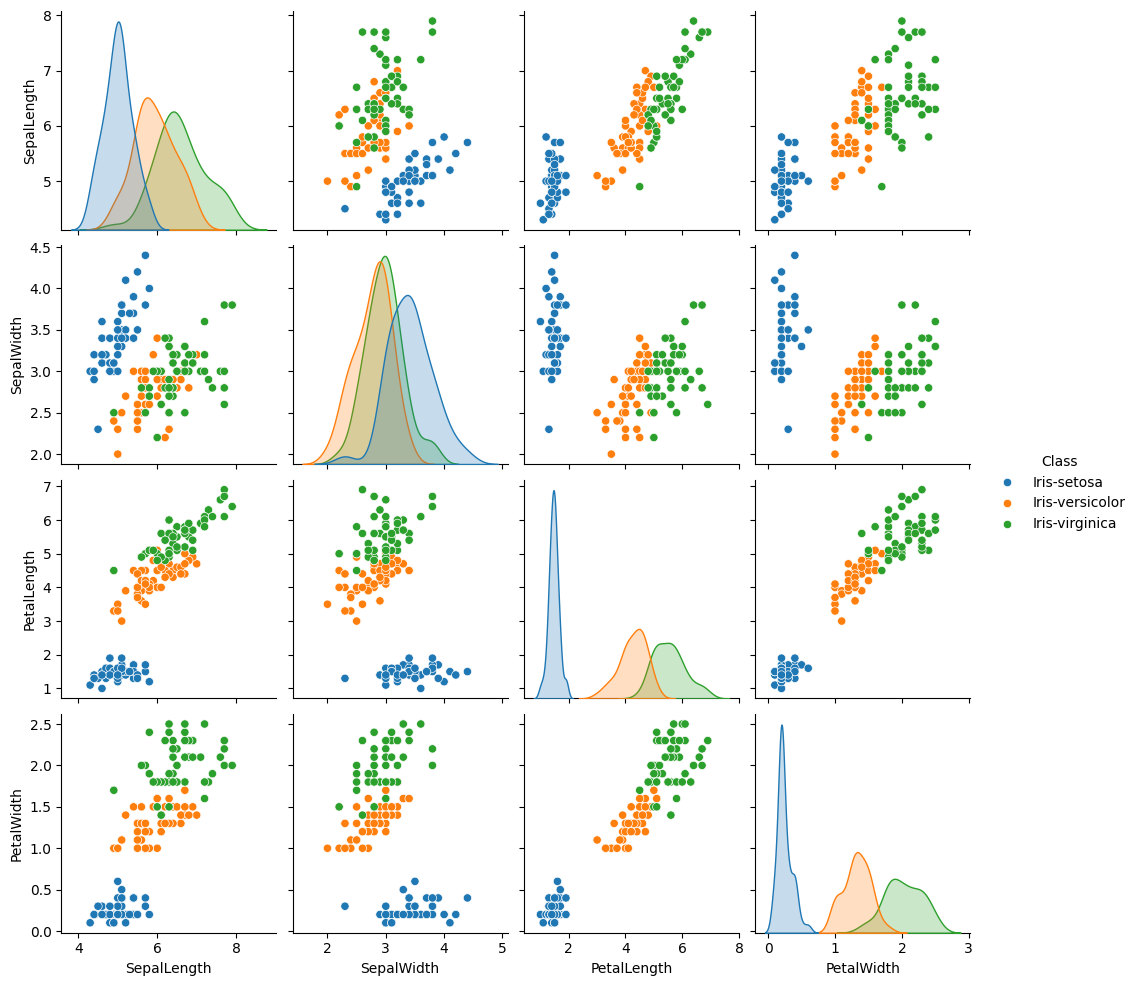

In [14]:
sns.pairplot(data, hue = 'Class')

In [15]:
X = data.iloc[:, :4]

In [17]:
T = data['Class'].replace(classes,[0,1,2])

In [18]:
T

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64

In [19]:
xTrain, xTest, tTrain, tTest = train_test_split(X, T, test_size = 0.2)

In [22]:
net = MLPClassifier(solver = 'sgd',
                    alpha = 1e-5,
                    verbose = 1, 
                    max_iter = 1000,
                    hidden_layer_sizes = (3, 3),
                    random_state = 1)

In [24]:
net.fit(xTrain, tTrain)

Iteration 1, loss = 1.13470111
Iteration 2, loss = 1.12799850
Iteration 3, loss = 1.11721841
Iteration 4, loss = 1.10232097
Iteration 5, loss = 1.08539945
Iteration 6, loss = 1.06692564
Iteration 7, loss = 1.04810178
Iteration 8, loss = 1.03346522
Iteration 9, loss = 1.02488830
Iteration 10, loss = 1.02189921
Iteration 11, loss = 1.02118541
Iteration 12, loss = 1.01962327
Iteration 13, loss = 1.01569375
Iteration 14, loss = 1.00934269
Iteration 15, loss = 1.00086738
Iteration 16, loss = 0.99097852
Iteration 17, loss = 0.98192192
Iteration 18, loss = 0.97341163
Iteration 19, loss = 0.96611420
Iteration 20, loss = 0.95984052
Iteration 21, loss = 0.95420714
Iteration 22, loss = 0.94872222
Iteration 23, loss = 0.94301468
Iteration 24, loss = 0.93700309
Iteration 25, loss = 0.93079772
Iteration 26, loss = 0.92455313
Iteration 27, loss = 0.91841093
Iteration 28, loss = 0.91253517
Iteration 29, loss = 0.90694097
Iteration 30, loss = 0.90150486
Iteration 31, loss = 0.89624916
Iteration 32, los

C:\Users\Fabius S Pop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), max_iter=1000,
              random_state=1, solver='sgd', verbose=1)

In [25]:
yTest = net.predict(xTest)

In [26]:
yTest

array([1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 2], dtype=int64)

In [27]:
accuracy_score(tTest, yTest)

0.9333333333333333

In [28]:
confusion_matrix(tTest, yTest)

array([[15,  0,  0],
       [ 0,  8,  2],
       [ 0,  0,  5]], dtype=int64)

Text(0.5, 1.0, 'Loss function')

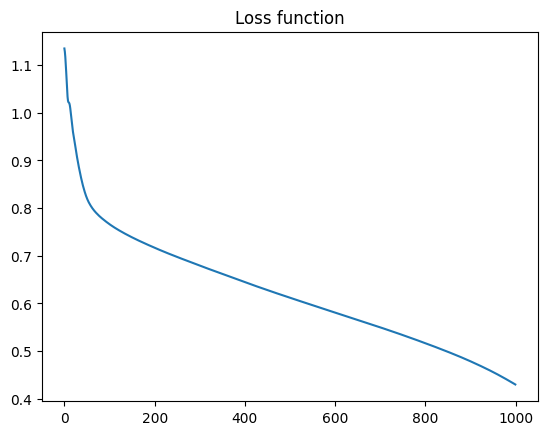

In [29]:
plt.figure()
loss_values = net.loss_curve_
plt.plot(loss_values)
plt.title('Loss function')